<a href="https://colab.research.google.com/github/iguv221/Tobigs_Assignment/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%B5%9C%EC%A0%81%ED%99%94_%EA%B9%80%EC%84%B1%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ToBigs/과제 폴더/2주차/18기 2주차 2 Optimization 강의 자료/18기 2주차 Optimization 강의 자료/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0])

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.09961579, 0.23175331, 0.00297295])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [ ]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-x_{i}\theta}}$

In [ ]:
def logistic(X, parameters):
    z = np.dot(X,parameters)
    p = 1/(1+np.exp(-z)) 
    return p

In [ ]:
logistic(X_train.iloc[1], parameters)

0.5925465778849593

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma(y_{i}\log p(X_{i}) + (1 - y_{i}) \log(1 - p(X_{i}))) $ 

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

In [ ]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X,parameters.T)
    loss = ((y-y_hat)**2)*0.5
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.7361782805094649

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $ -\Sigma(y_{i} - \theta^{T}X_{i})X_{ij} $
## ${\partial\over{\partial \theta_j}}l(p)=$ $ -\Sigma(y_{i} - p_{i})X_{ij} $

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = -(y-y_hat)*X[j]
    else:
        p = logistic(X,parameters)
        gradient = -(y-p)*X[j]
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.08739213065480109

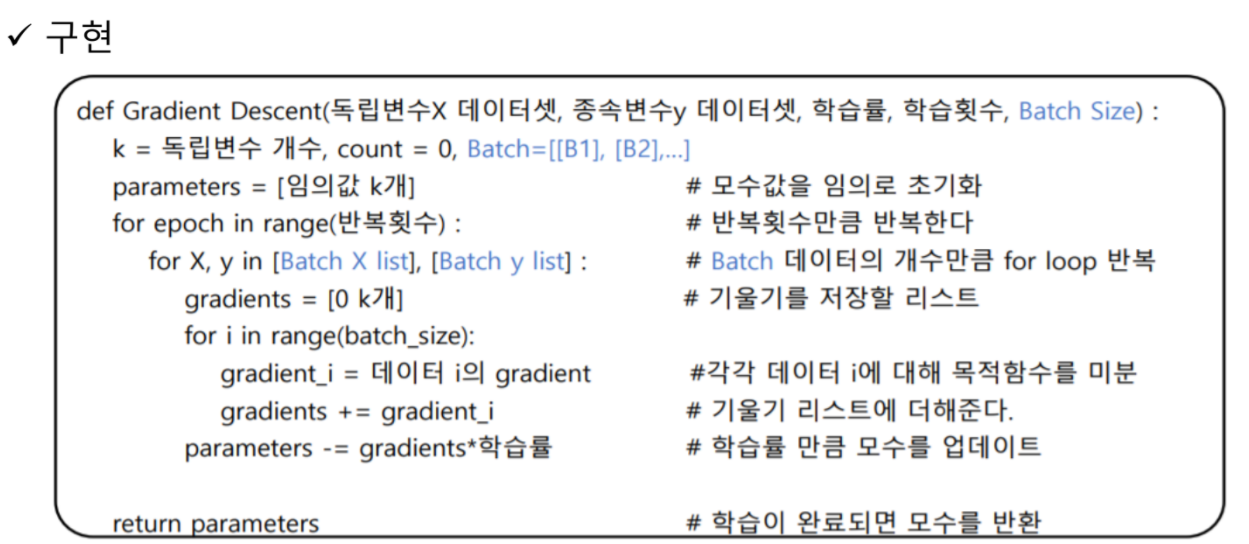

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[36.676324781084375, -9.411739929266975, 20.533849530866526]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: batch_size 은 학습을 할때 사용하는 batch 의 크기를 말합니다. 처음에는 batch size 의 개념 없이 전체 데이터를 이용해 gradient descent 을 진행했는데 이는 연산과 드는 시간이 너무 많아 불리했습니다. 그 뒤에 stochastic gradient descent SGD 의 이름으로 데이터 포인트 1개마다 gradient descent 을 시키는 방법이 제안되었는데 이는 훨씬 빠른 연산을 보여줬지만 최적해를 보장해주지 못했습니다. 따라서 이 둘의 중간인 mini-batch gradient descent 방법이 제안되었고 이는 1보다 큰 batch size 을 임의로 정해줘서 그 크기마다 parameter update 을 시켜주는 방식이었습니다.
### Gradient Descent GD : 전체 데이터셋을 한번의 update 에 사용.
### Stochastic Gradient Descent SGD : 하나의 데이터포인트을 한번의 update 에 사용.
### Mini-batch Gradient Descent : 임의의 batch size 을 학습하고 update 에 사용.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= -learning_rate / n
    parameters += gradients
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.0971707 , 0.23238076, 0.00160403])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 현재 반복학습된 횟수
- num_epoch: 전체 반복학습 횟수
<br>

BGD: 전체 데이터셋을 한번의 update 에 사용.  
SGD: 하나의 데이터포인트을 한번의 update 에 사용. 
MGD: 임의의 batch size 을 학습하고 update 에 사용.

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  <br>
batch_size=1 -> SGD<br>
batch_size=k -> MGD<br>
batch_size=whole -> BGD <br>

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))
            
            # 중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.73774582564429  params: [0.0508219  0.05243404 0.28279047]  gradients: [-0.023793977237846285, 0.005475220366675622, -0.017519540151904826]
epoch: 100  loss: 0.4619173277809779  params: [-0.85625262  0.79530708 -0.7184105 ]  gradients: [-0.002923192541608324, 0.0067152808151398225, -0.006769986712826094]
epoch: 200  loss: 0.3963852612029316  params: [-1.03285894  1.35324182 -1.27022105]  gradients: [-0.0011920261240163693, 0.004651592990214085, -0.004556219461791673]
epoch: 300  loss: 0.3639852522855183  params: [-1.13325991  1.75308475 -1.6602398 ]  gradients: [-0.0008764201334064205, 0.003459372113836655, -0.003360560937371401]
epoch: 400  loss: 0.34517240920464365  params: [-1.21275236  2.05883267 -1.95626514]  gradients: [-0.0007253046738389164, 0.0027155555353169354, -0.002620474732184696]
epoch: 500  loss: 0.3331702736181152  params: [-1.27949357  2.30346594 -2.19168198]  gradients: [-0.0006152423330308184, 0.002211856635463252, -0.0021227393633112676]
epoch: 60

array([-1.49911903,  3.06054135, -2.91204877])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 1)
new_param_sgd

epoch: 0  loss: 0.2813598126872543  params: [-0.86681886  1.06618556 -1.19038674]  gradients: [-0.025375351776706086, -0.013809290707597644, -0.017853862579744126]
epoch: 100  loss: 0.07736672668236964  params: [-1.93032555  4.17501912 -4.06769078]  gradients: [-0.007538544550270475, -0.004102483154634484, -0.005304050152138587]
epoch: 200  loss: 0.0773626655226249  params: [-1.9303681   4.1751431  -4.06780374]  gradients: [-0.007538159521907648, -0.004102273621831166, -0.005303779249747175]
epoch: 300  loss: 0.07736266518361727  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.0075381594897671435, -0.004102273604340272, -0.005303779227133413]
epoch: 400  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.007538159489764571, -0.004102273604338872, -0.005303779227131603]
epoch: 500  loss: 0.07736266518359017  params: [-1.9303681   4.17514311 -4.06780375]  gradients: [-0.007538159489764571, -0.004102273604338872, -0.005303779227131603]
e

array([-1.9303681 ,  4.17514311, -4.06780375])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 32)
new_param_mgd

epoch: 0  loss: 0.893787736163003  params: [ 0.6021038   0.57931476 -0.08133903]  gradients: [-0.036400248358601645, -0.017580833115924073, -0.03744217271883292]
epoch: 100  loss: 0.3402337881571801  params: [-1.31157656  2.38327724 -2.28769462]  gradients: [-0.0024127265798542167, -0.00026732954551407533, -0.004695549912760093]
epoch: 200  loss: 0.3135306588883297  params: [-1.53464753  3.10311987 -2.96722757]  gradients: [-0.003916925760146291, -0.0007958585026354153, -0.0023514035032111604]
epoch: 300  loss: 0.30499053273300675  params: [-1.66021291  3.49186082 -3.33016259]  gradients: [-0.004695312854791753, -0.0010613575229350032, -0.0013823054311898864]
epoch: 400  loss: 0.30133892844250276  params: [-1.73889684  3.73197702 -3.55293616]  gradients: [-0.005158362797005091, -0.0012155624480027678, -0.0008620810710494152]
epoch: 500  loss: 0.2995275968304403  params: [-1.79104687  3.88999182 -3.6989657 ]  gradients: [-0.005454558468295969, -0.0013124561882748595, -0.0005475985253169

array([-1.88270002,  4.18987205, -3.97143389])

### Predict Label

In [ ]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.57851884, 2.66322755])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.18693125212572057  params: [1.07784471 0.81924667]  gradients: [0.028262559860534425, 0.013747056622187288]
epoch: 100  loss: 0.18415713940028688  params: [0.64416198 2.58094439]  gradients: [0.012533317892764335, -0.0029765820227913224]
epoch: 200  loss: 0.18432166830784333  params: [0.64326713 2.58282264]  gradients: [0.012565169939259052, -0.0029785813352135927]
epoch: 300  loss: 0.18432186126723657  params: [0.64326608 2.58282484]  gradients: [0.012565207259735171, -0.0029785836777723915]
epoch: 400  loss: 0.18432186149332397  params: [0.64326608 2.58282484]  gradients: [0.012565207303462911, -0.0029785836805171265]
epoch: 500  loss: 0.18432186149358878  params: [0.64326608 2.58282484]  gradients: [0.012565207303514118, -0.0029785836805203527]
epoch: 600  loss: 0.18432186149358878  params: [0.64326608 2.58282484]  gradients: [0.01256520730351413, -0.002978583680520345]
epoch: 700  loss: 0.18432186149358878  params: [0.64326608 2.58282484]  gradients: [0.0125652073

array([0.64326608, 2.58282484])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

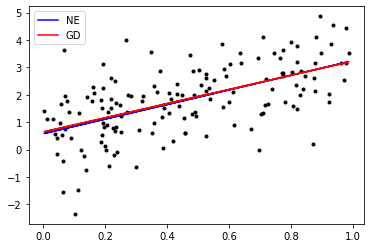

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()